##### [< Forrige](3%20-%20funksjoner%20med%20plot.ipynb)     |     [Neste >](5%20-%20tilbud%20og%20etterspørsel.ipynb)

# 4 - Lister, datastrukturer og Numpy

En liste er en *datastruktur*, som igjen er en organisering av *objekter*. Slike datastrukturer er helt sentralt i alle programmeringsspråk, og alle språk har ulike typer strukturer til ulike formål. I noen datastrukturer kan du putte alle typer objekter sammen, slik som tekst, funksjoner og tall og nye datastrukturer. 

I andre datastrukturer kan du kun putte tall. Slike datastrukturer er vanligvis det vi i matematikken kaller *vektorer* og *matriser*. Disse kommer vi tilbake til når vi skal snakke om Numpy. 

Det vi skal se på først er de innebygde datastrukturene til Python. Alle de innebygde strukturene kan inneholde alle typer objekter, men de har noen viktige egenskaper som skiller dem:
* `list` (liste): Hvert element har en bestemt plassering i listen, Tilgang fås ved å referere til plasseringen (indeksen) i form av et heltall `int`. 
* `Tuple`: Lik lister, men kan ikke forandres når den er skapt. Hovedsakelig til bruk i forbindelse med funksjoner.
* `dict`(dictionary, oppslag): Elementene har ikke en bestemt plassering. Tilgang fås ved å referere til en nøkkel (vanligvis en streng `str`)

Vi starter med å se på lister.

## Lister

Lister lages med klammeparenteser. Her er noen lister med navn, forkortelse (Ticker), aksjekurs, markedsverdi, PE og gjeldsgrad for noen aksjer på Oslo Børs. Tallene er fra 27. november 2020 (kilde https://tilon.uit.no). 

PE er "Price/Earnings", som er forholdet mellom selskapenes inntjening og prisen. Gjeldsgrad er hvor stor andel av total kapital som er gjeld. Det som ikke er gjeld er egenkapital. 

#### Eksempel 1:

In [58]:
equinor=['Equinor', 'EQNR', 167.554919090282, 376883380048.5, 6.14609823076753, 0.617893838660362]
dnb=['DNB', 'DNB', 164, 259169427140, 11.1121822724349, 0.914999939276725]
telenor=['Telenor', 'TEL', 148.737572948101, 227115017138.4, 13.0211568133471, 0.715300723576896]
marine_harvest=['Marine Harvest', 'MHG', 225.589705235372, 118004750966.2, 21.6878893009616, 0.440427599611273]
aker_bp=['Aker BP', 'AKERBP', 272.499264741749, 103712690592, 26.7636558040214, 0.722568840028356]
yara_international=['Yara International', 'YAR', 333.328922090651, 99481443032.4, 86.741957363663, 0.465057636887608]
gjensidige_forsikring=['Gjensidige Forsikring', 'GJF', 172.830508474576, 92125000000, 24.9404407385348, 0.847890127134592]

Vi kan nå få tilgang til listene ved å referere til plasseringen med klammeparentes. Om vi vil referere navnet til equinor, som ligger på plass 0, kan vi for eksempel skrive `equinor[0]` (første element er alltid på plass 0 i Python):

In [59]:
equinor[0]

'Equinor'

Vi ser at navnet er feil, dette er det gamle navnet til Equinor. Dette kan vi enkelt endre ved å sette element 0 i `equinor`-listen lik `'Equinor'`:

#### Eksempel 2:

In [60]:
print(equinor)
equinor[0]='Equinor'
print(equinor)

['Equinor', 'EQNR', 167.554919090282, 376883380048.5, 6.14609823076753, 0.617893838660362]
['Equinor', 'EQNR', 167.554919090282, 376883380048.5, 6.14609823076753, 0.617893838660362]


Men vi kan legge hvilke som helst objekter inn i en liste, så vi kan også lage en liste av listene over.

#### Eksempel 3:

In [61]:
stocks=[equinor,dnb,telenor,marine_harvest,aker_bp,yara_international,gjensidige_forsikring]
stocks

[['Equinor',
  'EQNR',
  167.554919090282,
  376883380048.5,
  6.14609823076753,
  0.617893838660362],
 ['DNB', 'DNB', 164, 259169427140, 11.1121822724349, 0.914999939276725],
 ['Telenor',
  'TEL',
  148.737572948101,
  227115017138.4,
  13.0211568133471,
  0.715300723576896],
 ['Marine Harvest',
  'MHG',
  225.589705235372,
  118004750966.2,
  21.6878893009616,
  0.440427599611273],
 ['Aker BP',
  'AKERBP',
  272.499264741749,
  103712690592,
  26.7636558040214,
  0.722568840028356],
 ['Yara International',
  'YAR',
  333.328922090651,
  99481443032.4,
  86.741957363663,
  0.465057636887608],
 ['Gjensidige Forsikring',
  'GJF',
  172.830508474576,
  92125000000,
  24.9404407385348,
  0.847890127134592]]

Aker BP-askjen er element nummer fem i denne listen. Om vi nå skal referere til den, så bruker vi indeks 4, siden vi starter på null. 

#### Eksempel 4:

In [62]:
stocks[4]

['Aker BP',
 'AKERBP',
 272.499264741749,
 103712690592,
 26.7636558040214,
 0.722568840028356]

Om du vil referere til siste element, bruker du indeks -1. Vil du referere til nest siste, bruker du indeks -2, og så videre:

#### Eksempel 5:

In [63]:
print(stocks[-1])
print(stocks[-2])

['Gjensidige Forsikring', 'GJF', 172.830508474576, 92125000000, 24.9404407385348, 0.847890127134592]
['Yara International', 'YAR', 333.328922090651, 99481443032.4, 86.741957363663, 0.465057636887608]


Du kan også referere til flere elementer som står vedsidenav hverandre med en såkalt `slice`:

#### Eksempel 6:

In [64]:
#Fra element to til og med tre:
stocks[2:4]

[['Telenor',
  'TEL',
  148.737572948101,
  227115017138.4,
  13.0211568133471,
  0.715300723576896],
 ['Marine Harvest',
  'MHG',
  225.589705235372,
  118004750966.2,
  21.6878893009616,
  0.440427599611273]]

In [65]:
#Fra og med nest siste element:
stocks[-2:]

[['Yara International',
  'YAR',
  333.328922090651,
  99481443032.4,
  86.741957363663,
  0.465057636887608],
 ['Gjensidige Forsikring',
  'GJF',
  172.830508474576,
  92125000000,
  24.9404407385348,
  0.847890127134592]]

In [66]:
#Til og med nest siste element:
stocks[:-1]

[['Equinor',
  'EQNR',
  167.554919090282,
  376883380048.5,
  6.14609823076753,
  0.617893838660362],
 ['DNB', 'DNB', 164, 259169427140, 11.1121822724349, 0.914999939276725],
 ['Telenor',
  'TEL',
  148.737572948101,
  227115017138.4,
  13.0211568133471,
  0.715300723576896],
 ['Marine Harvest',
  'MHG',
  225.589705235372,
  118004750966.2,
  21.6878893009616,
  0.440427599611273],
 ['Aker BP',
  'AKERBP',
  272.499264741749,
  103712690592,
  26.7636558040214,
  0.722568840028356],
 ['Yara International',
  'YAR',
  333.328922090651,
  99481443032.4,
  86.741957363663,
  0.465057636887608]]

Og vi kan referere til en liste inne i en liste:

#### Eksempel 7:

In [67]:
print(f"Det tredje selskapet er {stocks[2][0]}")

Det tredje selskapet er Telenor


Det tredje selskapet, altså Equinor, har indeks to, siden Python starter indekseringen på 0. 

Det er enkelt å utvide lister, vi bruker bare `+`. Om vi for eksempel vil legge til selskapet `['Tomra Systems', 'TOM', 276.409619134278, 41208789715.2, 52.8996016883184, 0.454299114121939] `, kan vi gjøre det slik:

#### Eksempel 8:

In [68]:
tomra_systems=['Tomra Systems', 'TOM', 276.409619134278, 41208789715.2, 52.8996016883184, 0.454299114121939]
stocks=stocks+[tomra_systems]
stocks

[['Equinor',
  'EQNR',
  167.554919090282,
  376883380048.5,
  6.14609823076753,
  0.617893838660362],
 ['DNB', 'DNB', 164, 259169427140, 11.1121822724349, 0.914999939276725],
 ['Telenor',
  'TEL',
  148.737572948101,
  227115017138.4,
  13.0211568133471,
  0.715300723576896],
 ['Marine Harvest',
  'MHG',
  225.589705235372,
  118004750966.2,
  21.6878893009616,
  0.440427599611273],
 ['Aker BP',
  'AKERBP',
  272.499264741749,
  103712690592,
  26.7636558040214,
  0.722568840028356],
 ['Yara International',
  'YAR',
  333.328922090651,
  99481443032.4,
  86.741957363663,
  0.465057636887608],
 ['Gjensidige Forsikring',
  'GJF',
  172.830508474576,
  92125000000,
  24.9404407385348,
  0.847890127134592],
 ['Tomra Systems',
  'TOM',
  276.409619134278,
  41208789715.2,
  52.8996016883184,
  0.454299114121939]]

## Unngå objektreferansefeil!

En veldig vanlig nybegynnerfeil i Python er å glemme at selv om et objekt, slik som en liste, har fått nytt navn, så er det fortsatt det samme objektet.  

Under brukes `pop`-metoden til listeobjektet. En "metode" er en funksjon som kan henges på et bestemt objekt. Liste-objektet har altså en metode `pop`, som vi kan henge på listeobjektet med et punktum. `pop`-metoden fjerner elementet angitt av argumentet (siste element `-1` i eksemplet under), og returnerer det fjernede elementet. 

`pop`-metoden endrer altså på objektet ved å fjerne siste observasjon. Som vi ser av utskriften, er `stocks` og `stocks2` egentlig samme objekt, så når vi skriver ut `stocks`, så mangler også den siste element, selv om operasjonen ble gjort på `stocks2`.

#### Eksempel 9:

In [71]:
stocks2=stocks
last_element=stocks2.pop(-1)
print(last_element)
stocks

['Yara International', 'YAR', 333.328922090651, 99481443032.4, 86.741957363663, 0.465057636887608]


[['Equinor',
  'EQNR',
  167.554919090282,
  376883380048.5,
  6.14609823076753,
  0.617893838660362],
 ['DNB', 'DNB', 164, 259169427140, 11.1121822724349, 0.914999939276725],
 ['Telenor',
  'TEL',
  148.737572948101,
  227115017138.4,
  13.0211568133471,
  0.715300723576896],
 ['Marine Harvest',
  'MHG',
  225.589705235372,
  118004750966.2,
  21.6878893009616,
  0.440427599611273],
 ['Aker BP',
  'AKERBP',
  272.499264741749,
  103712690592,
  26.7636558040214,
  0.722568840028356]]

Hver gang du kjører koden over, forsvinner altså det siste elementet For å unngå dette må du skapet et nytt objekt ved å *kopiere* det gamle. For lister skaper du et nyt objekt ved å bruke `list`-nøkkelordet til å skape en ny liste. Forsøk selv å sette inn `stocks=list(stocks)` i stedet for `stocks2=stocks` øverst, og se hva som skjer. Da lages et nytt liste objekt, som kun eksisterer inne i funksjonen. 

# Tuple

En `tuple` fungerer ganske likt som en liste når du skal hente noe fra den. Men i motsetning til en liste, så går det ikke an å endre på en `tuple` etter at den er skapt. Du kan lage en tuple enten ved å bruke den innebygde funksjonen  `tuple()` eller ved å lage en liste med en vanlig parentes:

#### Eksempel 10:

In [72]:
a=tuple(equinor)
b=('Equinor', 'EQNR', 146.85, 315357973561)
print(type(a))
print(type(b))

<class 'tuple'>
<class 'tuple'>


Vi kan *få tak i* innholdet, men det går ikke an å *endre* på innholdet i en `tuple`etter at den er skapt:

#### Eksempel 11:

In [73]:
print(a[0])
a[0]='Statoil'

Equinor


TypeError: 'tuple' object does not support item assignment

Tuple er mest brukt i forbindelse med funksjoner, og er ikke noe vi kommer til å bruke mye tid på i dette kurset. 

# Numpy

Numpy er en pakke som kan gjøre matematiske beregninger på store datasett svært effektivt. Vi starter med å importere pakken, og konvertere listen vi har brukt til en numpy-matrise kalt `ndarray`. En *matrise* er en liste der alle rader har like mangee elementer, og det er jo tilfelle med vår `stocks`-liste.

Vi starter med å definere en liste av liste med informasjon om aksjene:

#### Eksempel 12:

In [74]:
stocks=[
['Equinor', 'EQNR', 167.554919090282, 376883380048.5, 6.14609823076753, 0.617893838660362] , 
['DNB', 'DNB', 164, 259169427140, 11.1121822724349, 0.914999939276725] , 
['Telenor', 'TEL', 148.737572948101, 227115017138.4, 13.0211568133471, 0.715300723576896] , 
['Marine Harvest', 'MHG', 225.589705235372, 118004750966.2, 21.6878893009616, 0.440427599611273] , 
['Aker BP', 'AKERBP', 272.499264741749, 103712690592, 26.7636558040214, 0.722568840028356] , 
['Yara International', 'YAR', 333.328922090651, 99481443032.4, 86.741957363663, 0.465057636887608] , 
['Gjensidige Forsikring', 'GJF', 172.830508474576, 92125000000, 24.9404407385348, 0.847890127134592] , 
['Orkla', 'ORK', 86.5857852597003, 89087299091.2, 26.5615083754323, 0.350968405416214] , 
['Norsk Hydro', 'NHY', 31.4389402413895, 67532103728.64, 15.6215830970715, 0.439195576287418] , 
['SalMar', 'SALM', 449.3, 50905689550.7, 14.222545257898, 0.396134627028104] , 
['Tomra Systems', 'TOM', 276.409619134278, 41208789715.2, 52.8996016883184, 0.454299114121939] , 
['Aker', 'AKER', 514.200494811093, 40393931997, 43.4343354806452, 0.548092886866901] , 
]

Som du ser, så består listen under av tolv rader og fire kolonner. Dette er altså en 7x6-matrise. Den kan enkelt konverteres til en numpy-matrise med funksjonen `np.array()` slik som her:

#### Eksempel 13:

In [75]:
import numpy as np
stocks_np=np.array(stocks)

Listen er nå lagret som en numpy 12x6-matrise i objektet `stocks_np`. Vi kan imidlertid ikke utføre noen matematiske beregninger slik denne matrisen står, fordi alle tall er i tekstformat. Som vi har sett tidligere går det bare an å regne med `float`, `int` og `bool`. At det er tekst ser vi ved at det er enkle anførselstegn `'` rundt alle elementene. 

Heldigvis er det veldig enkelt å hente ut informasjon fra numpy-matriser, fordi mulighetene til å "slice" er langt større enn for vanlige lister. I motsetning til vanlige lister, kan vi for eksempel velge ut kolonner. I en liste av lister velger du, som vi har sett, rad 2 og kolonne 0 med `stocks[2][0]`. Med numpy-matriser separerer du de to indeksene med et komma, `stocks[2,0]`.

Men enda viktigere, du kan velge alle elementer ved å sette inn kolon `:` i stedet for tall. Dermed kan du velge hele kolonne 0 med `stocks_np[:,0]`.

Her er vi mest interessert i de to siste kolonnene. Det er disse som inneholder tall. For å plukke ut disse velger vi alle radene (`:`) og alle kolonnene fra og med kolonne 2 (`2:`). Da får vi

#### Eksempel 14:

In [76]:
stocks_np[:,2:]

array([['167.554919090282', '376883380048.5', '6.14609823076753',
        '0.617893838660362'],
       ['164', '259169427140', '11.1121822724349', '0.914999939276725'],
       ['148.737572948101', '227115017138.4', '13.0211568133471',
        '0.715300723576896'],
       ['225.589705235372', '118004750966.2', '21.6878893009616',
        '0.440427599611273'],
       ['272.499264741749', '103712690592', '26.7636558040214',
        '0.722568840028356'],
       ['333.328922090651', '99481443032.4', '86.741957363663',
        '0.465057636887608'],
       ['172.830508474576', '92125000000', '24.9404407385348',
        '0.847890127134592'],
       ['86.5857852597003', '89087299091.2', '26.5615083754323',
        '0.350968405416214'],
       ['31.4389402413895', '67532103728.64', '15.6215830970715',
        '0.439195576287418'],
       ['449.3', '50905689550.7', '14.222545257898', '0.396134627028104'],
       ['276.409619134278', '41208789715.2', '52.8996016883184',
        '0.454299114121939'

Sist i matrisen over, står det `dtype='<U21'`. Det betyr at dette er tekstrenger på 21 eller færre tegn. Vi må imidlertid ha dette over i tallformat for å kunne jobbe med det. Det gjør vi slik:

#### Eksempel 15:

In [77]:
stocks_numbers=np.array(stocks_np[:,2:],dtype=float)
stocks_numbers

array([[1.67554919e+02, 3.76883380e+11, 6.14609823e+00, 6.17893839e-01],
       [1.64000000e+02, 2.59169427e+11, 1.11121823e+01, 9.14999939e-01],
       [1.48737573e+02, 2.27115017e+11, 1.30211568e+01, 7.15300724e-01],
       [2.25589705e+02, 1.18004751e+11, 2.16878893e+01, 4.40427600e-01],
       [2.72499265e+02, 1.03712691e+11, 2.67636558e+01, 7.22568840e-01],
       [3.33328922e+02, 9.94814430e+10, 8.67419574e+01, 4.65057637e-01],
       [1.72830508e+02, 9.21250000e+10, 2.49404407e+01, 8.47890127e-01],
       [8.65857853e+01, 8.90872991e+10, 2.65615084e+01, 3.50968405e-01],
       [3.14389402e+01, 6.75321037e+10, 1.56215831e+01, 4.39195576e-01],
       [4.49300000e+02, 5.09056896e+10, 1.42225453e+01, 3.96134627e-01],
       [2.76409619e+02, 4.12087897e+10, 5.28996017e+01, 4.54299114e-01],
       [5.14200495e+02, 4.03939320e+10, 4.34343355e+01, 5.48092887e-01]])

Når vi konverterte listen til en `ndarray`, så brukte vi altså funksjonen `np.array()`, slik som i Eksempel 13. Men denne gangen legger vi til det valgfrie argument `dtype=float` for å eksplisitt gi beskjed om at vi ønsker strengene konvertert til flyttal. 

Nå kan vi begynne å bruke tallene. For eksempel kan vi se grafisk om det er en sammenheng mellom gjeldsgrad og pris-inntjeningstraten (PE). Dette er de to siste kolonnene i datamatrisen:

#### Eksempel 16:

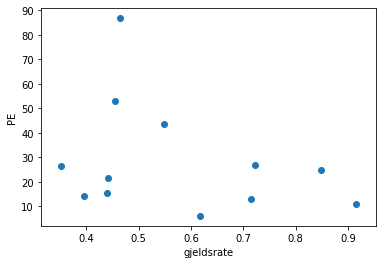

In [78]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots()
ax.set_ylabel('PE')
ax.set_xlabel('gjeldsrate')
ax.scatter(stocks_numbers[:,-1], stocks_numbers[:,-2])

Ser du en sammenheng?

## Oppslag

Et oppslag, eller *dictionary* har symbol `dict` i Python. Dette er en datastruktur der hvert element ikke identifiseres med hvor det er plassert, men med et nøkkelord (`key`). Å bruke oppslag i stedet for lister gjør ofte koden mer lesbar. Det finnes to måter å lage oppslag på; enten ved å bruke funksjonen `dict()`:

#### Eksempel 17:

In [79]:
a=dict()
a['gjeldsrate']=stocks_numbers[:,-1]
a['PE']=stocks_numbers[:,-1]
print(type(a))

<class 'dict'>


Som vi ser, blir dette et objekt av type `dict`. Alternativt kan vi definere elementer inne i en krølleparentes på formen `{nøkkel: objekt}`, slik som dette:

In [80]:
b={
    'gjeldsrate':stocks_numbers[:,-1],
    'PE':stocks_numbers[:,-2], 
  }

print(type(b))

<class 'dict'>


Her er det altså to elementer med nøkler `'gjeldsrate'` og `'PE'`, og tilhørende objekter fra `stocks_numbers`. 

Vi legger merke til at dette også er en objekt av type `dict`. Med oppslag blir det enklere å bruke variablene, siden vi kan referere til dem med navn i stedet for indeks. Her er plottet i Eksempel 16 gjort med oppslag:

#### Eksempel 18:

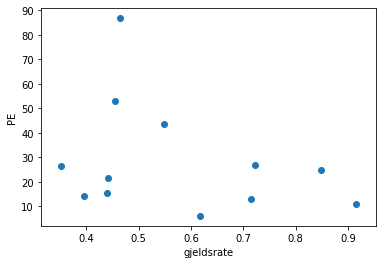

In [81]:
fig,ax=plt.subplots()
ax.set_ylabel('PE')
ax.set_xlabel('gjeldsrate')
ax.scatter(a['gjeldsrate'], b['PE'])

`dict`-objektet er helt sentralt i selve byggeklossene til Python. Alle variabler du lager er faktisk elementer i to `dict` som du kan få frem med funksjonene `locals()` og `globals()`, som kaller de lokalt og globalt definerte variablene i miljøet du befinner deg. Dette eksemplet viser at objektet `stocks` som vi har definert i Eksempel 12, er identisk med elementet `'stocks'` i `locals()`.

#### Eksempel 19:

In [82]:
locals()['stocks']==stocks

True

Vi ser at disse objektene egentlig er det samme, ved at den logiske testen om disse er like, returnerer sann (`True`).

## Oppgaver

#### Oppgave 1:


##### [< Forrige](3%20-%20funksjoner%20med%20plot.ipynb)     |     [Neste >](5%20-%20tilbud%20og%20etterspørsel.ipynb)